<a href="https://colab.research.google.com/github/Brunolts01/data_science/blob/main/projeto_deteccao_fraude_cartoes_de_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações de instituições financeiras como bancos e fintechs. No Brasil, nesse ano de 2022, apenas primeiro semestre foram registradas **2,8 milhões** tentativas deste tipo de fraude. Número de golpes é **8% maior** em comparação ao mesmo período de 2021. Os golpes bancários no Brasil devem gerar **prejuízos** de ao menos R$ **2,5 bilhões** até o final do ano.

<p align=center>

<img src="https://t4.ftcdn.net/jpg/03/21/43/07/360_F_321430761_qQi0CU9tzI5w1k1vJgdA02LMtXtsXvJE.jpg" width="60%"></p>

As fraudes envolvendo cartões de crédito são de grande relevância uma vez que sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeiro.


###### Vamos importar alguns pacotes necessários + arquivo para análise. Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O dataset representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

In [1]:
# Importar pacotes necessários

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skplt

# Configurar o notebook
sns.set_style()

# Importar o arquivo
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

df = pd.read_csv(file_path) 

### Nessa primeira parte iremos conhecer nosso dataset e suas principais características

In [2]:
# Visualizar as primeiras entrada
print("Volume do DF: {}\n".format(df.shape))

df.head(10)

Volume do DF: (284807, 31)



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
# Resumo estatístico dos dados
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# Verificando se o dataset possui valores nulos

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Fraudes representam 0.1727% da dataset. 



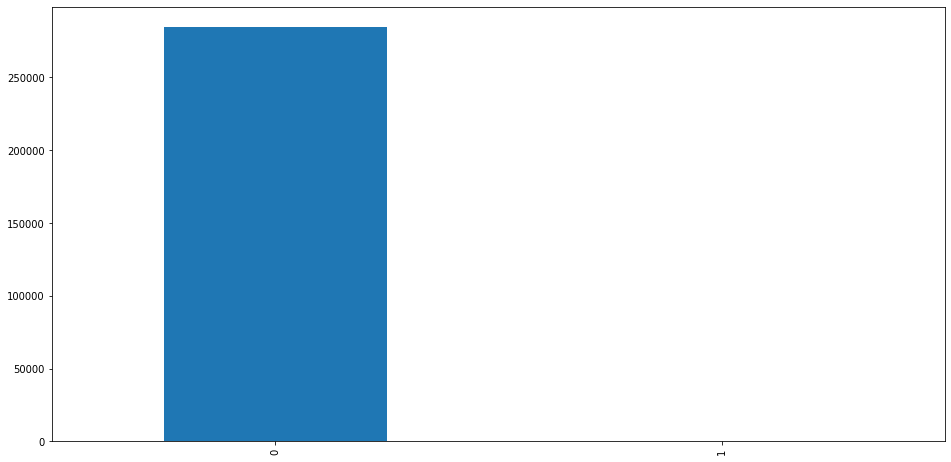

In [5]:
# Verificar balanceamento do dataset

print('Fraudes representam {:.4f}% da dataset. \n'.format((df.loc[df.Class == 1]).shape[0] / df.shape[0] * 100))

fig, ax = plt.subplots(figsize=(16, 8))

df['Class'].value_counts().plot(kind='bar');

plt.show();

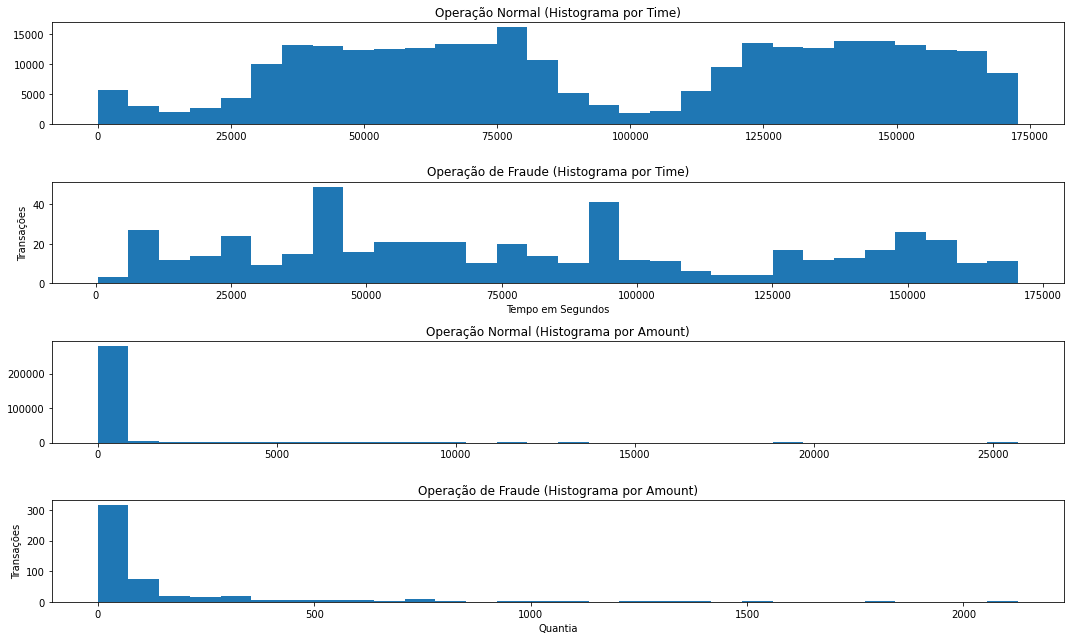

In [6]:
# Plotando histogramadas das varíaveis Time e Amount

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 9))

ax[0].hist(df.Time[df.Class == 0], bins=30)
ax[0].set_title('Operação Normal (Histograma por Time)')

ax[1].hist(df.Time[df.Class == 1], bins=30)
ax[1].set_title('Operação de Fraude (Histograma por Time)')
ax[1].set_xlabel('Tempo em Segundos')
ax[1].set_ylabel('Transações')

ax[2].hist(df.Amount[df.Class == 0], bins=30)
ax[2].set_title('Operação Normal (Histograma por Amount)')

ax[3].hist(df.Amount[df.Class == 1], bins=30)
ax[3].set_title('Operação de Fraude (Histograma por Amount)')
ax[3].set_xlabel('Quantia')
ax[3].set_ylabel('Transações')


plt.tight_layout()

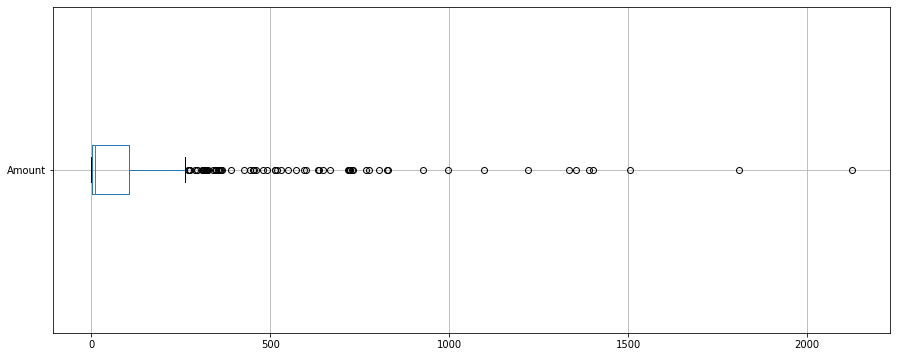

In [7]:
# Boxplot Fraude (Valor Financeiro)

fig, ax = plt.subplots(figsize=(15, 6))

df.loc[df['Class'] == 1].boxplot(['Amount'], vert=False);

###### Como se vê no gráfico acima, boa parte das operações fraudulentas são operações abaixo de 1.000.

### Preparação dos Dados

Iremos normalizar nossas variáveis Amount e Time para o mesmo padrão que há no restante do dataset.

In [8]:
df_new = df.copy()

from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()

df_new['Amount_new'] = scaler_standard.fit_transform(df['Amount'].values.reshape(-1, 1))
df_new['Time_new'] = scaler_standard.fit_transform(df['Time'].values.reshape(-1, 1))

In [9]:
df_new.drop(['Time', 'Amount'], axis=1, inplace=True)
df_new.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_new,Time_new
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


### Divisão do conjunto de dados entre treino e validação

Iremos treinar nosso modelo e validá-lo. Porém, antes disso iremos balancear nossos dados. Como visto acima, no plot de gráfico por Class há uma dispersão muito grande entre a Classe 1 e 0, o que pode prejudicar nosso modelo de Regressão Logística. Para isso, iremos usar a técnica **under-sampling**. Mais detalhes sobre a mesma podem ser encontrados no seguinte artigo: *https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/*

In [10]:
# Importando pacotes necessários e separando dados de treino e teste

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from numpy import logical_and

# 1. escolher e importar um modelo
from sklearn.linear_model import LogisticRegression

# 2. Instanciar e escolher os hyperparameters
model = LogisticRegression()

# 3. Separar os dados entre feature matrix e target vector 
X = df_new.drop('Class', axis=1)
y = df_new['Class']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)



0    373
1    373
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


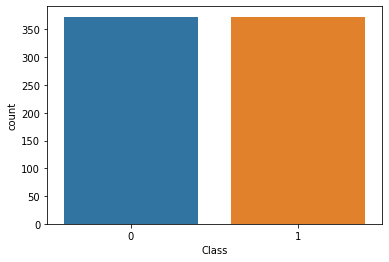

In [11]:
# Balanceando dados
rus = RandomUnderSampler()

X_res, y_res = rus.fit_resample(X_train, y_train)

# Ver o balanceamento das classes
print(pd.Series(y_res).value_counts())

# Visualizando gráfico por Classe
sns.countplot(y_res);

#### Com nossos dados devidamente balanceados podemos seguir com nosso modelo

In [12]:
# 4. Fit do modelo (treinar)
model = LogisticRegression()
model.fit(X_res, y_res)

# 5. Fazer previsões em cima de novos dados
# X_test = scaler.transform(X_test) # Padronizar os dados de teste
y_pred = model.predict(X_test)

#### Agora iremos avaliar nosso modelo

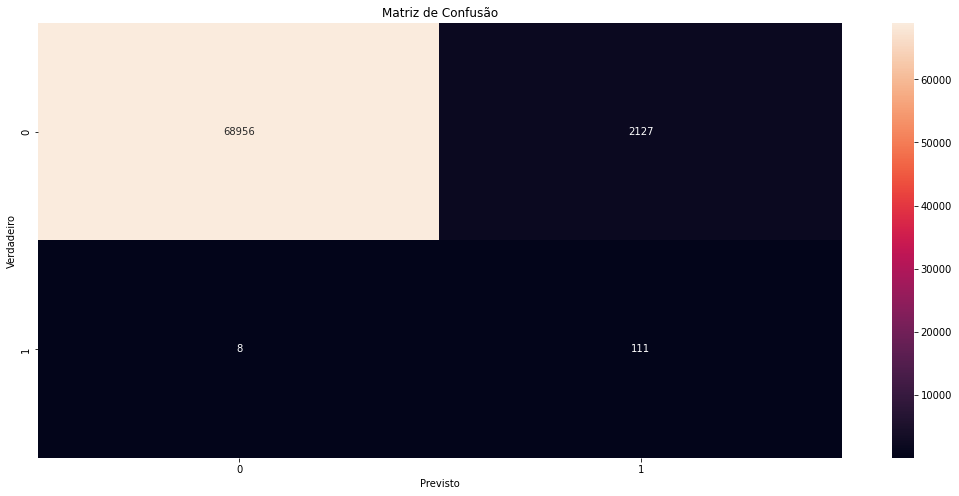

In [13]:
# Matrix de confusão
fig, ax = plt.subplots(figsize=(18,8))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax, fmt='.0f' )

ax.set_title('Matriz de Confusão')
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Previsto')

plt.show()

In [14]:
# Relatório completo de classificação

print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9701    0.9848     71083
           1     0.0496    0.9328    0.0942       119

    accuracy                         0.9700     71202
   macro avg     0.5247    0.9514    0.5395     71202
weighted avg     0.9983    0.9700    0.9833     71202

Acurácia: 0.9700

AUC: 0.9514



## Considerações Finais

Como se vê, tivemos sucesso no nosso modelo, conseguindo uma acurácia de 97%. Deixo destacado que o balancemaneto de classes foi fundamental para o processo. Sem isso nosso modelo responderia muito bem para as entradas de classe majotirária (0 = Transação Normal), mas teria um desempenho inferior para a classe minotirária (1 = Transação de Fraude).